In [ ]:
import numpy as np
import pandas as pd
import os


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/archive (5)/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join(r'/content/drive/MyDrive/archive (5)/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)



In [ ]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3295, 150, 150, 3)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

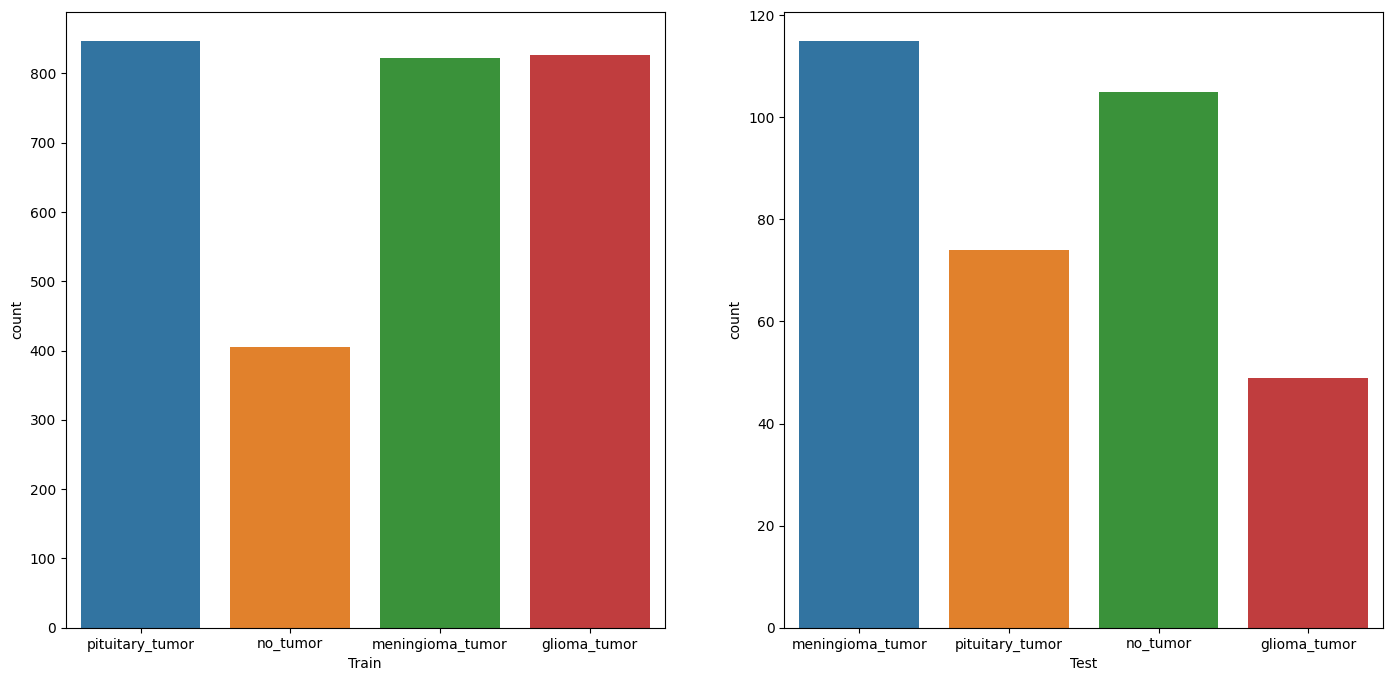

In [ ]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
84/84 [==============================] - 521s 6s/step - loss: 1.8015 - accuracy: 0.2822 - val_loss: 1.3384 - val_accuracy: 0.2963
Epoch 2/20
84/84 [==============================] - 518s 6s/step - loss: 1.2751 - accuracy: 0.4033 - val_loss: 1.1544 - val_accuracy: 0.4916
Epoch 3/20
84/84 [==============================] - 518s 6s/step - loss: 1.0302 - accuracy: 0.5431 - val_loss: 0.9023 - val_accuracy: 0.5993
Epoch 4/20
84/84 [==============================] - 519s 6s/step - loss: 0.8663 - accuracy: 0.6162 - val_loss: 0.7896 - val_accuracy: 0.6330
Epoch 5/20
84/84 [==============================] - 517s 6s/step - loss: 0.7539 - accuracy: 0.6780 - val_loss: 0.7483 - val_accuracy: 0.6431
Epoch 6/20
84/84 [==============================] - 517s 6s/step - loss: 0.7054 - accuracy: 0.7069 - val_loss: 0.7140 - val_accuracy: 0.7104
Epoch 7/20
84/84 [==============================] - 512s 6s/step - loss: 0.6057 - accuracy: 0.7549 - val_loss: 0.6943 - val_accuracy: 0.6902
Epoch 8/20
84

In [ ]:
acc = history.history['accuracy']
print(acc)
a = len(acc)
cnn_acc= acc[a-1]

print(cnn_acc)

[0.2822338938713074, 0.40329834818840027, 0.5431034564971924, 0.6161919236183167, 0.6780359745025635, 0.7068965435028076, 0.7548725605010986, 0.7747376561164856, 0.8144677877426147, 0.8373313546180725, 0.872188925743103, 0.8759370446205139, 0.8826836347579956, 0.9070464968681335, 0.9276611804962158, 0.9374063014984131, 0.9494003057479858, 0.9479010701179504, 0.9374063014984131, 0.9467766284942627]
0.9467766284942627


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

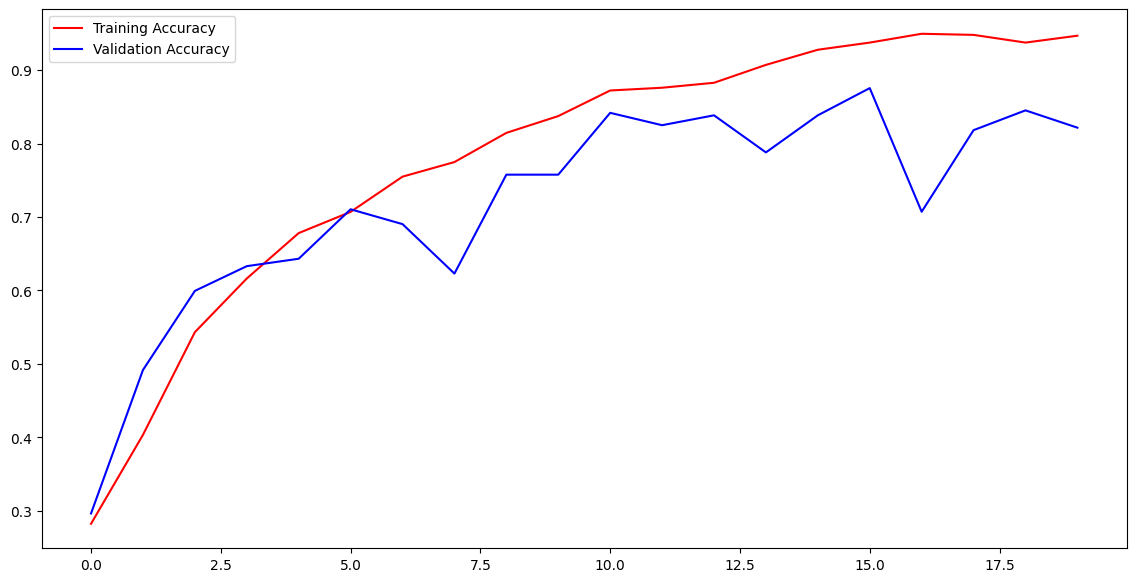

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()


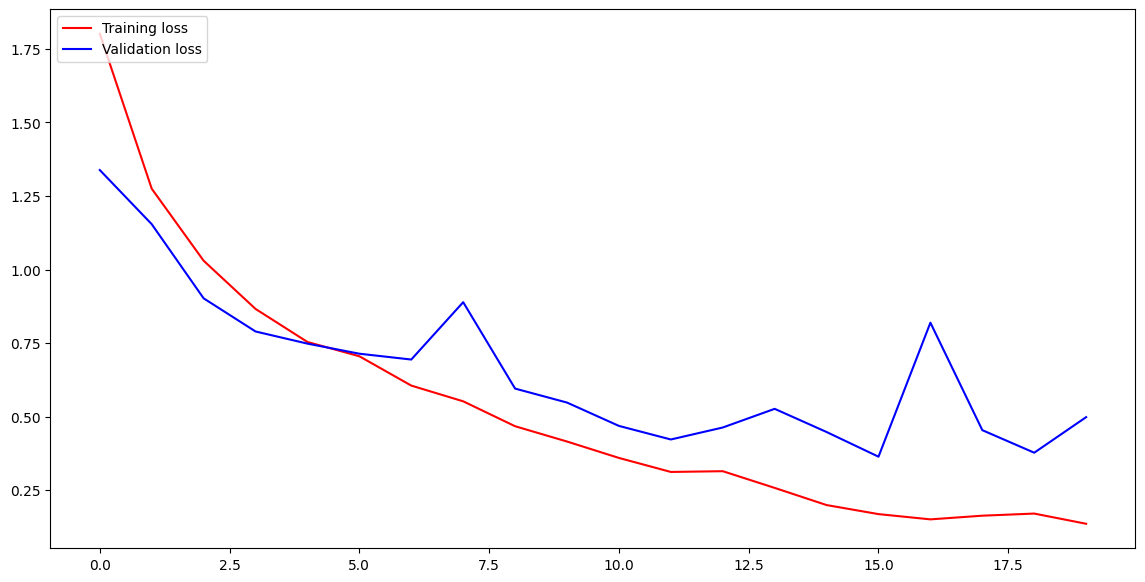

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
img = cv2.imread('/content/drive/MyDrive/archive (5)/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

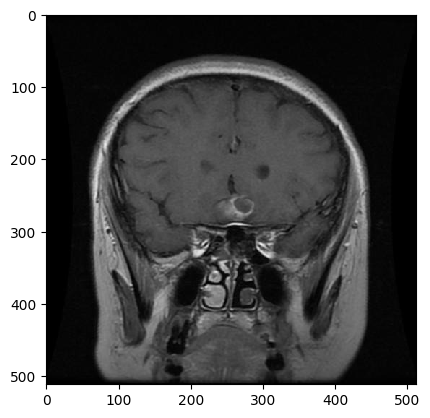

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/archive (5)/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])


1/1 [==============================] - 0s 214ms/step
pituitary_tumor


In [ ]:
img = cv2.imread('/content/drive/MyDrive/archive (5)/Training/pituitary_tumor/p (105).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

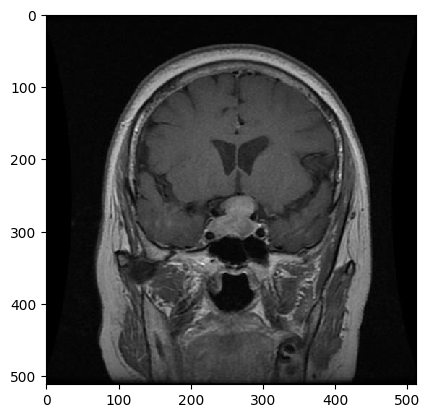

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/archive (5)/Training/pituitary_tumor/p (105).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

1/1 [==============================] - 0s 63ms/step
pituitary_tumor


In [ ]:
img = cv2.imread('/content/drive/MyDrive/archive (5)/Training/no_tumor/image (16).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

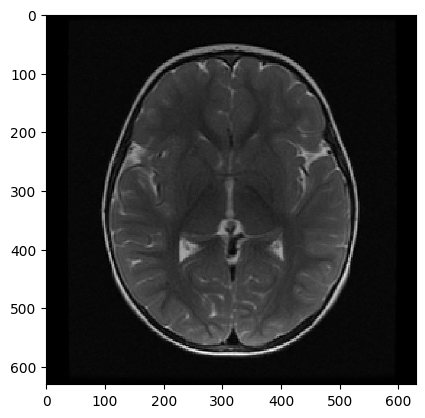

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/archive (5)/Training/no_tumor/image (16).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

1/1 [==============================] - 0s 66ms/step
no_tumor


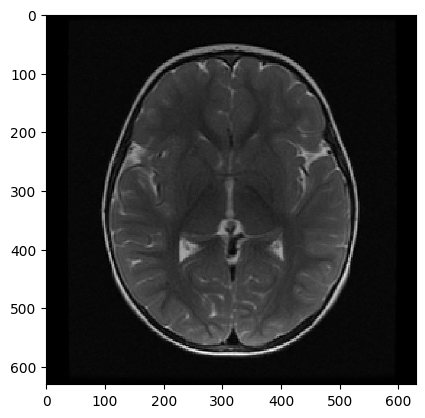

1/1 [==============================] - 0s 60ms/step
no_tumor


In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/archive (5)/Training/no_tumor/image (16).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

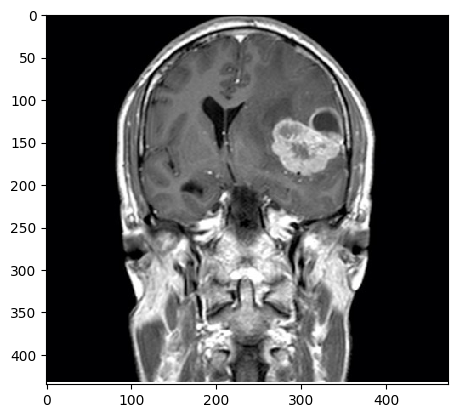

1/1 [==============================] - 0s 104ms/step
meningioma_tumor


In [ ]:
img = cv2.imread('/content/WhatsApp Image 2023-11-19 at 2.47.28 PM.jpeg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/WhatsApp Image 2023-11-19 at 2.47.28 PM.jpeg')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

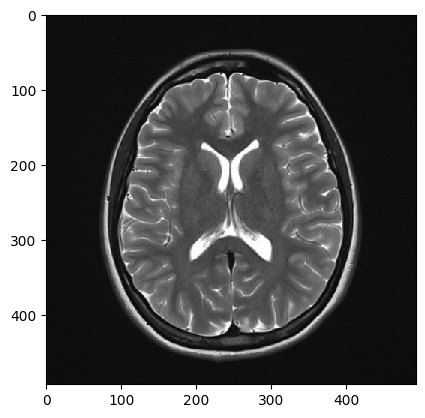

1/1 [==============================] - 0s 170ms/step
no_tumor


In [ ]:
img = cv2.imread('/content/WhatsApp Image 2023-11-19 at 2.48.14 PM.jpeg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/WhatsApp Image 2023-11-19 at 2.48.14 PM.jpeg')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])

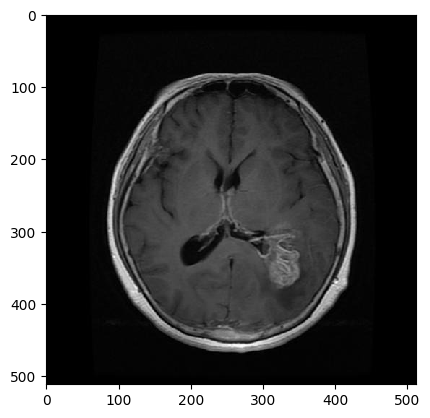

1/1 [==============================] - 0s 211ms/step
glioma_tumor


In [ ]:
img = cv2.imread(r'/content/drive/MyDrive/archive (5)/Training/glioma_tumor/gg (1).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img(r'/content/drive/MyDrive/archive (5)/Training/glioma_tumor/gg (10).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices
print(labels[indices])


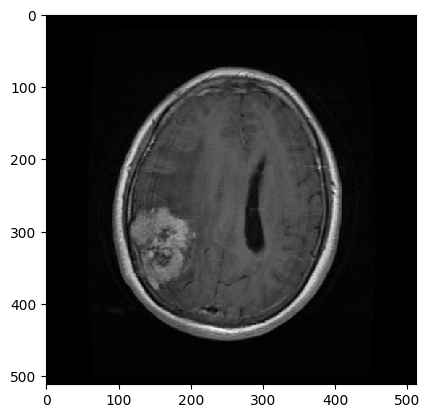

1/1 [==============================] - 0s 76ms/step
1


In [ ]:
img = cv2.imread('/content/drive/MyDrive/archive (5)/Training/meningioma_tumor/m (109).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/archive (5)/Training/meningioma_tumor/m (109).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices
print(indices)

In [ ]:
img = cv2.imread('/content/drive/MyDrive/archive (5)/Training/no_tumor/image(104).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/archive (5)/Training/no_tumor/image(104).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices

In [ ]:
img = cv2.imread('/content/drive/MyDrive/archive (5)/Training/glioma_tumor/gg (101).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape
img_array = img_array.reshape(1,150,150,3)
img_array.shape
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/archive (5)/Training/glioma_tumor/gg (101).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()
a=model.predict(img_array)
indices = a.argmax()
indices

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
path = os.listdir('/content/drive/MyDrive/archive (5)/Training')
classes = {'no_tumor': 0, 'glioma_tumor': 1 ,'meningioma_tumor': 2,'pituitary_tumor': 3}

In [ ]:
import cv2
X, Y = [], []
for cls in classes:
    pth = '/content/drive/MyDrive/archive (5)/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
np.unique(Y)

array([0, 1, 2, 3])

In [ ]:
X = np.array(X)
y = np.array(Y)
pd.Series(Y).value_counts()

3    847
1    827
2    822
0    405
dtype: int64

In [ ]:
X.shape

(2901, 200, 200)

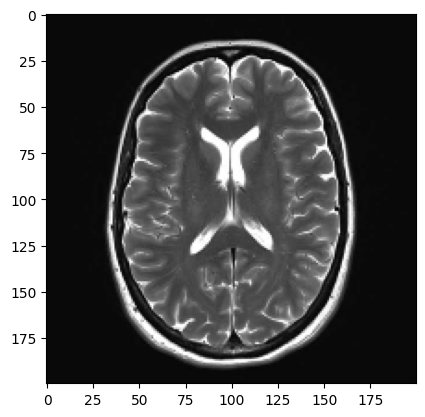

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
plt.imshow(X[3], cmap='gray')

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2901, 40000)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

((2320, 40000), (581, 40000))

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca_train = pca.fit_transform(xtrain)
pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(pca_train, ytrain)

KNeighborsClassifier()

In [ ]:
print("Training Score: ", knn.score(pca_train, ytrain))
print("testing Score: ", knn.score(pca_test, ytest))
knn_acc = knn.score(pca_train, ytrain)
print(knn_acc)

Training Score:  0.8806034482758621
testing Score:  0.7917383820998278
0.8806034482758621


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(pca_train, ytrain)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
print("Training Score: ", rf.score(pca_train, ytrain))
print("testing Score: ", rf.score(pca_test, ytest))
rf_acc = rf.score(pca_train, ytrain)
print(rf_acc)

Training Score:  1.0
testing Score:  0.9053356282271945
1.0


In [ ]:
dec = {0: 'No Tumor', 1:'glioma tumor',2:'meningioma tumor',3:'pituitary tumor'}

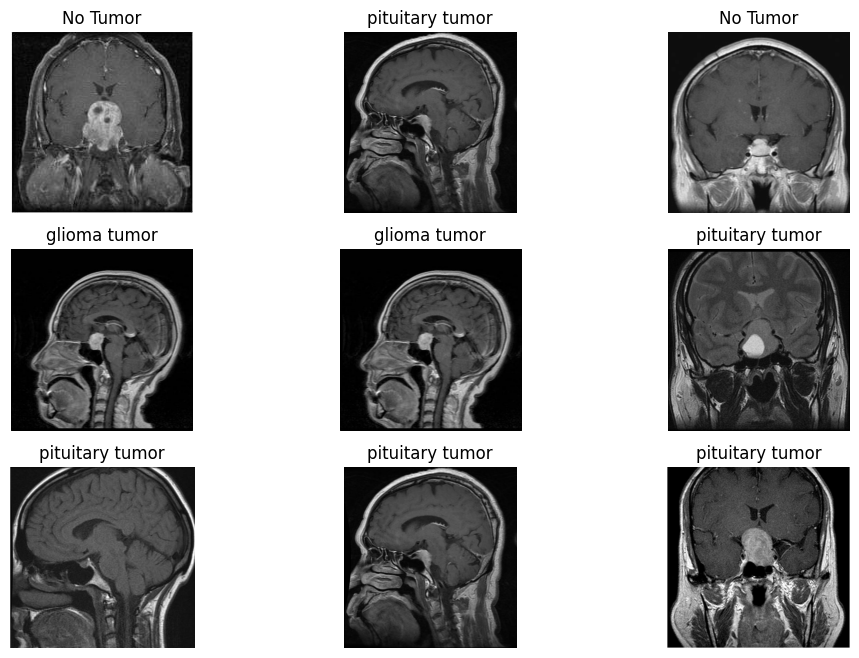

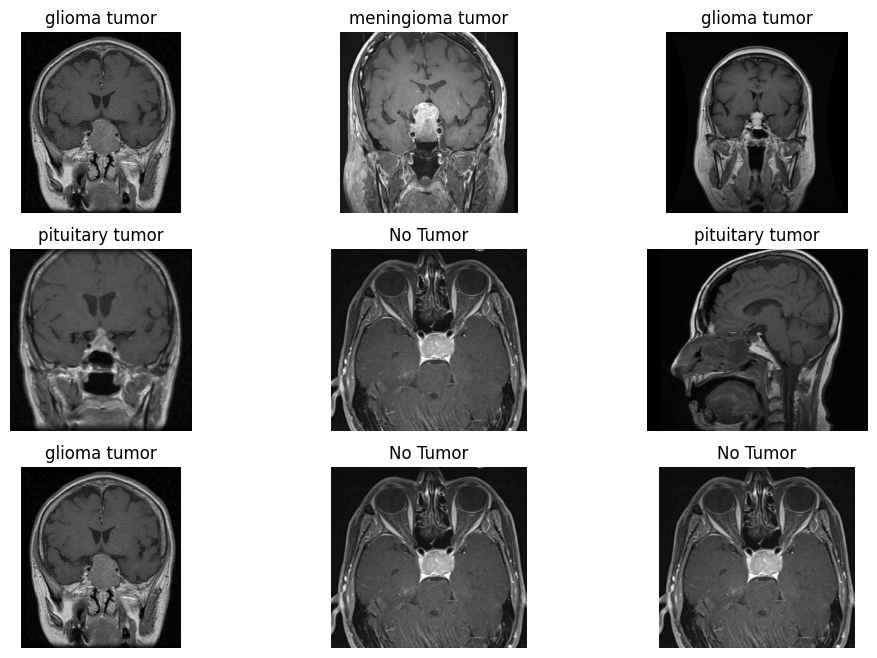

In [ ]:
plt.figure(figsize = (12,8))
p=os.listdir('/content/drive/MyDrive/archive (5)/Testing')
c = 1
for i in os.listdir('/content/drive/MyDrive/archive (5)/Testing/pituitary_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("/content/drive/MyDrive/archive (5)/Testing/pituitary_tumor/"+i, 0)
    img1=cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = knn.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

#son 9 image
plt.figure(figsize=(12, 8))
p = os.listdir('/content/drive/MyDrive/archive (5)/Testing')
c = 1
file_list = os.listdir('/content/drive/MyDrive/archive (5)/Testing/pituitary_tumor/')
for i in file_list[-9:]:
    plt.subplot(3, 3, c)
    img = cv2.imread("/content/drive/MyDrive/archive (5)/Testing/pituitary_tumor/" + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = knn.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

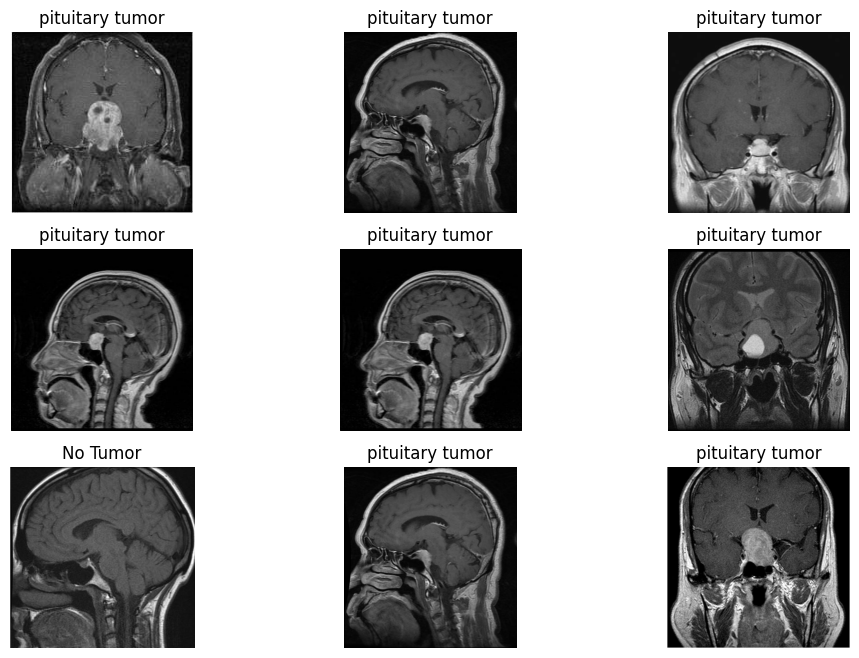

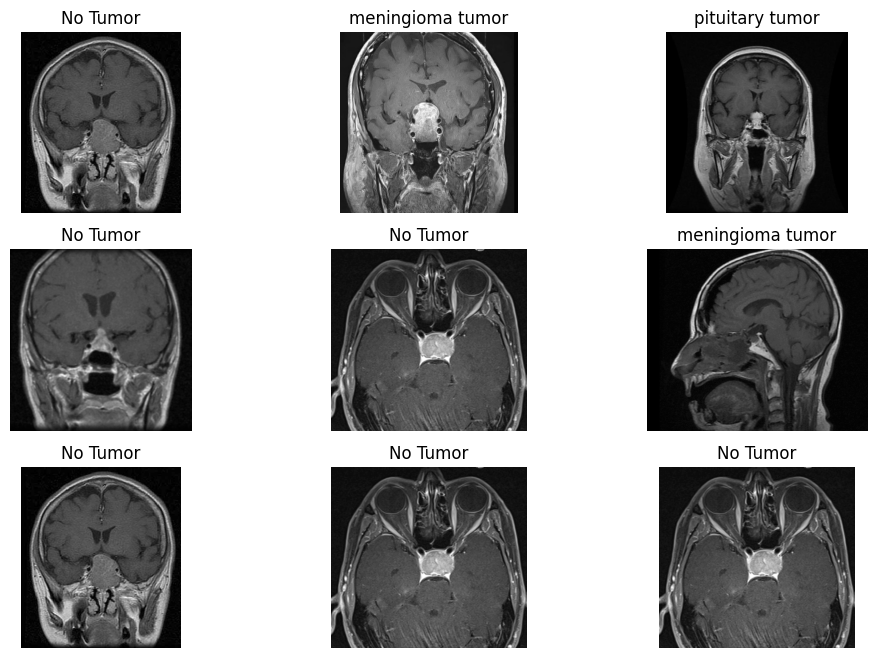

In [ ]:
plt.figure(figsize = (12,8))
p=os.listdir('/content/drive/MyDrive/archive (5)/Testing')
c = 1
for i in os.listdir('/content/drive/MyDrive/archive (5)/Testing/pituitary_tumor/')[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("/content/drive/MyDrive/archive (5)/Testing/pituitary_tumor/"+i, 0)
    img1=cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = rf.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

#son 9 image
plt.figure(figsize=(12, 8))
p = os.listdir('/content/drive/MyDrive/archive (5)/Testing')
c = 1
file_list = os.listdir('/content/drive/MyDrive/archive (5)/Testing/pituitary_tumor/')
for i in file_list[-9:]:
    plt.subplot(3, 3, c)
    img = cv2.imread("/content/drive/MyDrive/archive (5)/Testing/pituitary_tumor/" + i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = rf.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

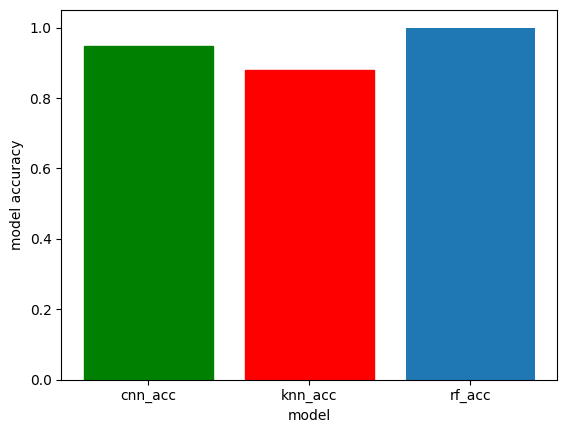

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(['cnn_acc','knn_acc','rf_acc'])
y = np.array([cnn_acc,knn_acc,rf_acc])

bar = plt.bar(x,y)
plt.xlabel('model')
plt.ylabel('model accuracy')
bar[0].set_color('green')
bar[1].set_color('red')
plt.show()





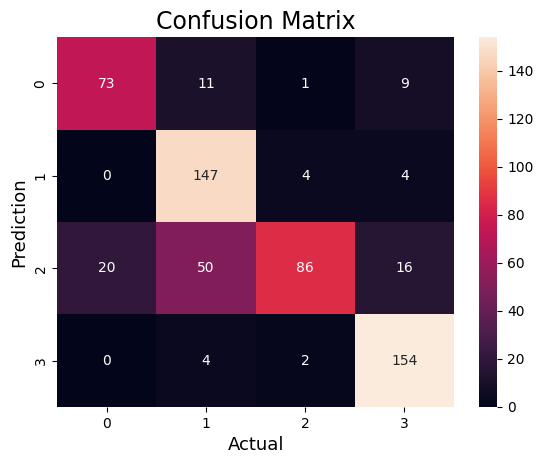

Accuracy : 0.7917383820998278


In [ ]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# preduction
ypred = knn.predict(xtest)

# compute the confusion matrix
cm = confusion_matrix(ytest,ypred)

#Plot the confusion matrix.
sns.heatmap(cm,
			annot=True,
			fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(ytest, ypred)
print("Accuracy :", accuracy)


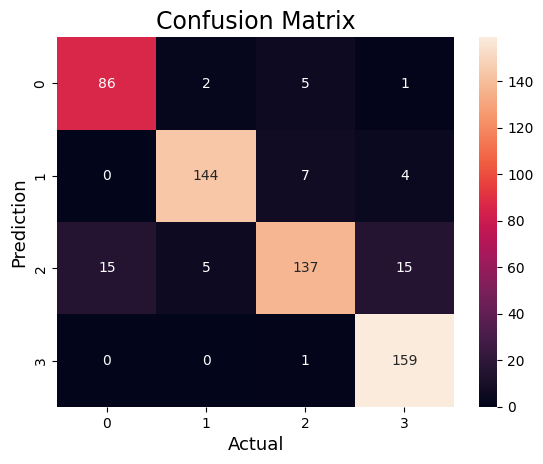

Accuracy : 0.9053356282271945


In [ ]:
# preduction
ypred = rf.predict(xtest)

# compute the confusion matrix
cm = confusion_matrix(ytest,ypred)

#Plot the confusion matrix.
sns.heatmap(cm,
			annot=True,
			fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = accuracy_score(ytest, ypred)
print("Accuracy :", accuracy)